# Comparison of SPIDER (PDAC dataset)
This notebook showcases the comparison between SPIDER and SpatialDM using the PDAC dataset

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import time
R_path = 'source /etc/profile;module load GCC/11.2.0 OpenMPI/4.1.1 R/4.2.0 Anaconda3/2022.05 R-bundle-Bioconductor/3.15-R-4.2.0;R'
from spider import SPIDER
op=SPIDER()
from utils import *

ds = 'PDAC'
sample_name = 'PDAC_A'
adata = anndata.read_h5ad(f'../example_datasets/{ds}/{sample_name}/adata.h5ad')

if not os.path.exists(f'../results/{ds}'):
    os.makedirs(f'../results/{ds}/')
out_f = f'../results/{ds}/{sample_name}/'
if not os.path.exists(out_f):
    os.makedirs(out_f)
if len(adata.obs_names) > 200:
    sc.pp.filter_genes(adata, min_cells=20)
    
start = time.time()
idata = op.prep(adata, cluster_key=adata.uns['cluster_key'], is_human=adata.uns['is_human'], is_sc=adata.uns['is_sc'], itermax=1000, imputation=True, normalize_total=True)
idata.write(f'{out_f}idata.h5ad')
runtime = time.time()-start
with open(f'{out_f}ot_runtime.txt', 'w') as f:
    f.write(str(runtime))
    
start = time.time()
op.svi.tf_corr(idata, adata, adata.uns['is_human'], out_f, threshold=0.3, n_jobs=30, overwrite=True, step=None, keep_top_score=5)
runtime = time.time()-start
with open(f'{out_f}tf_runtime.txt', 'w') as f:
    f.write(str(runtime))
    
start = time.time()
idata, meta_idata = op.find_svi(idata, out_f, R_path, alpha=0.3, overwrite=True, n_jobs=1, svi_number=0)
runtime = time.time()-start
with open(f'{out_f}svi_runtime.txt', 'w') as f:
    f.write(str(runtime))


Using human LR pair dataset.
Using human pathway dataset.
Running imputation with MAGIC
Calculating MAGIC...
  Running MAGIC on 428 cells and 5581 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.40 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.62 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.67 seconds.
Normalizing total counts per cell to the median of total counts for cells before normalization
using 0.75
Located 1151 interfaces on 1267 power cell boundaries with distance cutoff 1.4142135623730951.
Dropped 185 out of 1151 interfaces for low capacity cells.
Normalizing total interaction strength per interface to the median of total interaction strength for interfaces before normalization
Construct idata with 1394 interfaces and

Processing cells: 100%|██████████| 428/428 [00:14<00:00, 29.81it/s]


0227:1525


Processing receptors: 100%|██████████| 92/92 [00:01<00:00, 47.01it/s] 


374/386 LRIs (97%) are predicted to be activated by downstream genes (threshold=0.3).
Excluded 12/498 LRIs (2%) without SV support (threshold=0.3).
using 16*16 SOM nodes for 1394 points


-------------------------------------------------------------------------------
The following dependent module(s) are not currently loaded: ncurses/6.0 (required by: htop/2.0.1)
-------------------------------------------------------------------------------

The following have been reloaded with a version change:
  1) ncurses/6.0 => ncurses/6.2



ARGUMENT '../results/PDAC/PDAC_A/idata_count.csv' __ignored__

ARGUMENT '../results/PDAC/PDAC_A/idata_meta.csv' __ignored__

ARGUMENT '../results/PDAC/PDAC_A/' __ignored__

ARGUMENT '1' __ignored__


R version 4.2.0 (2022-04-22) -- "Vigorous Calisthenics"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(nnSVG)
> library(scran)


Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOr

> library(SpatialExperiment)
> library(BRISC)
> 
> args = commandArgs()
> 
> if (length(args)==0) {
+   stop("not enough input", call.=FALSE)
+ }
> 
> count_f <- args[4]
> meta_f <- args[5]
> out_f <- args[6]
> 
> counts <- read.csv(count_f, row.names=1, check.names=F, stringsAsFactors=FALSE)
> colData <- read.csv(meta_f, stringsAsFactors=FALSE, row.names=1, check.names=F)
> rowData <- data.frame(gene_name=colnames(counts))
> 
> tryCatch({
+   spe <-  SpatialExperiment(
+     assay = list(counts = t(counts)), 
+     colData = colData, 
+     rowData = rowData,
+     spatialCoordsNames = c("row", "col"))
+   ix_zero_genes <- rowSums(counts(spe)) == 0
+   if (sum(ix_zero_genes) > 0) {
+     spe <- spe[!ix_zero_genes, ]
+   }
+ 
+   spe <- computeLibraryFactors(spe)
+   size_factors <- sizeFactors(spe)
+   zero_sf_cells <- names(size_factors[size_factors == 0])
+   spe <- spe[, !colnames(spe) %in% zero_sf_cells]
+   spe <- logNormCounts(spe)
+   # replace nan with 0
+   counts(spe)[is.na(

Loading required package: RANN
Loading required package: parallel
Loading required package: rdist
Loading required package: pbapply
The ordering of inputs x (covariates) and y (response) in BRISC_estimation has been changed BRISC 1.0.0 onwards.
  Please check the new documentation with ?BRISC_estimation.


> 
> 
> 
Added key nnSVG in idata.uns


Models: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]
2024-10-29 14:06:30.714801: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Added key SOMDE in idata.uns


2024-10-29 14:06:30.716631: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 14:06:30.750191: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 14:06:30.751332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 14:06:31.370698: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-10-29 14:06:33.532901: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55f8c4e9c440 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-10-29 14:06:33.532946: I tensorflow/compiler/xla/service/service.cc:177]  

  0%|          | 0/498 [00:00<?, ?it/s]

2024-10-29 14:06:33.767042: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-10-29 14:06:33.773647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32
	 [[{{node Placeholder/_4}}]]
2024-10-29 14:06:33.773824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32
	 [[{{node Placeholder/_4}}]]
2024-10-29 14:06:33.953259: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


Added key SpatialDE2 in idata.uns


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Added key SpatialDE in idata.uns


-------------------------------------------------------------------------------
The following dependent module(s) are not currently loaded: ncurses/6.0 (required by: htop/2.0.1)
-------------------------------------------------------------------------------

The following have been reloaded with a version change:
  1) ncurses/6.0 => ncurses/6.2



ARGUMENT '../results/PDAC/PDAC_A/idata_count.csv' __ignored__

ARGUMENT '../results/PDAC/PDAC_A/idata_meta.csv' __ignored__

ARGUMENT '../results/PDAC/PDAC_A/' __ignored__

ARGUMENT '1' __ignored__


R version 4.2.0 (2022-04-22) -- "Vigorous Calisthenics"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library('SPARK')
> args = commandArgs()
> set.seed(20230617)
> 
> if (length(args)==0) {
+   stop("not

  0%|          | 0/1000 [00:00<?, ?/s]

Added key moranI in idata.uns


  0%|          | 0/1000 [00:00<?, ?/s]

Added key gearyC in idata.uns
finished running all SVI tests
Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SpatialDE2' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC'
 'moranI']
43/498 SVIs identified (threshold=0.01).
Excluding 1 genes without TF support
42/498 tf-supported SVIs identified.
normalizing
normalizing
normalizing
{0: -1, 4: -1}
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[42]
using controlled pattern
finished regression


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

finished lengthscale
iter 0, ELBO: -2.16e+10
iter 1, ELBO: -2.16e+10, delta_ELBO: 2.77e+07
iter 2, ELBO: -2.16e+10, delta_ELBO: 1.70e+04
iter 3, ELBO: -2.16e+10, delta_ELBO: 9.64e+03
iter 4, ELBO: -2.16e+10, delta_ELBO: 4.13e+03
iter 5, ELBO: -2.16e+10, delta_ELBO: 2.65e+03
iter 6, ELBO: -2.16e+10, delta_ELBO: 9.18e+01
iter 7, ELBO: -2.16e+10, delta_ELBO: 3.08e+00
iter 8, ELBO: -2.16e+10, delta_ELBO: 1.06e-01
iter 9, ELBO: -2.16e+10, delta_ELBO: 3.79e-03
Converged on iter 9
finished fitting
eventually found 5 patterns
[1 4 0 0 4 4 4 4 2 0 0 4 0 2 0 4 4 1 0 2 3 2 4 1 0 0 2 1 0 2 0 3 2 2 1 0 2
 3 2 1 2 2]
Added key pattern_score in idata.obsm and method results and running time in uns


Basic result validation

Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SpatialDE2' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC'
 'moranI']
43/498 SVIs identified (threshold=0.01).
Excluding 1 genes without TF support
42/498 tf-supported SVIs identified.
evaluating with ['moranI' 'gearyC' 'SOMDE' 'nnSVG']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Geary
C (rev.)_SVI vs. Geary
C (rev.)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:1.668e-18 U_stat=1.734e+04
Moran
I_SVI vs. Moran
I_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:9.671e-19 U_stat=1.740e+04
FSV
(SOMDE)_SVI vs. FSV
(SOMDE)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:2.498e-19 U_stat=1.753e+04
LR
(SOMDE)_SVI vs. LR
(SOMDE)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjam

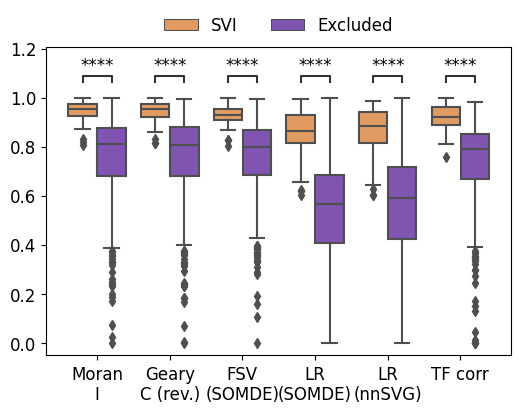

In [3]:
svi_df, svi_df_strict = op.svi.combine_SVI(idata,threshold=0.01)
op.svi.eva_SVI(idata, svi_df_strict)
plt.show()

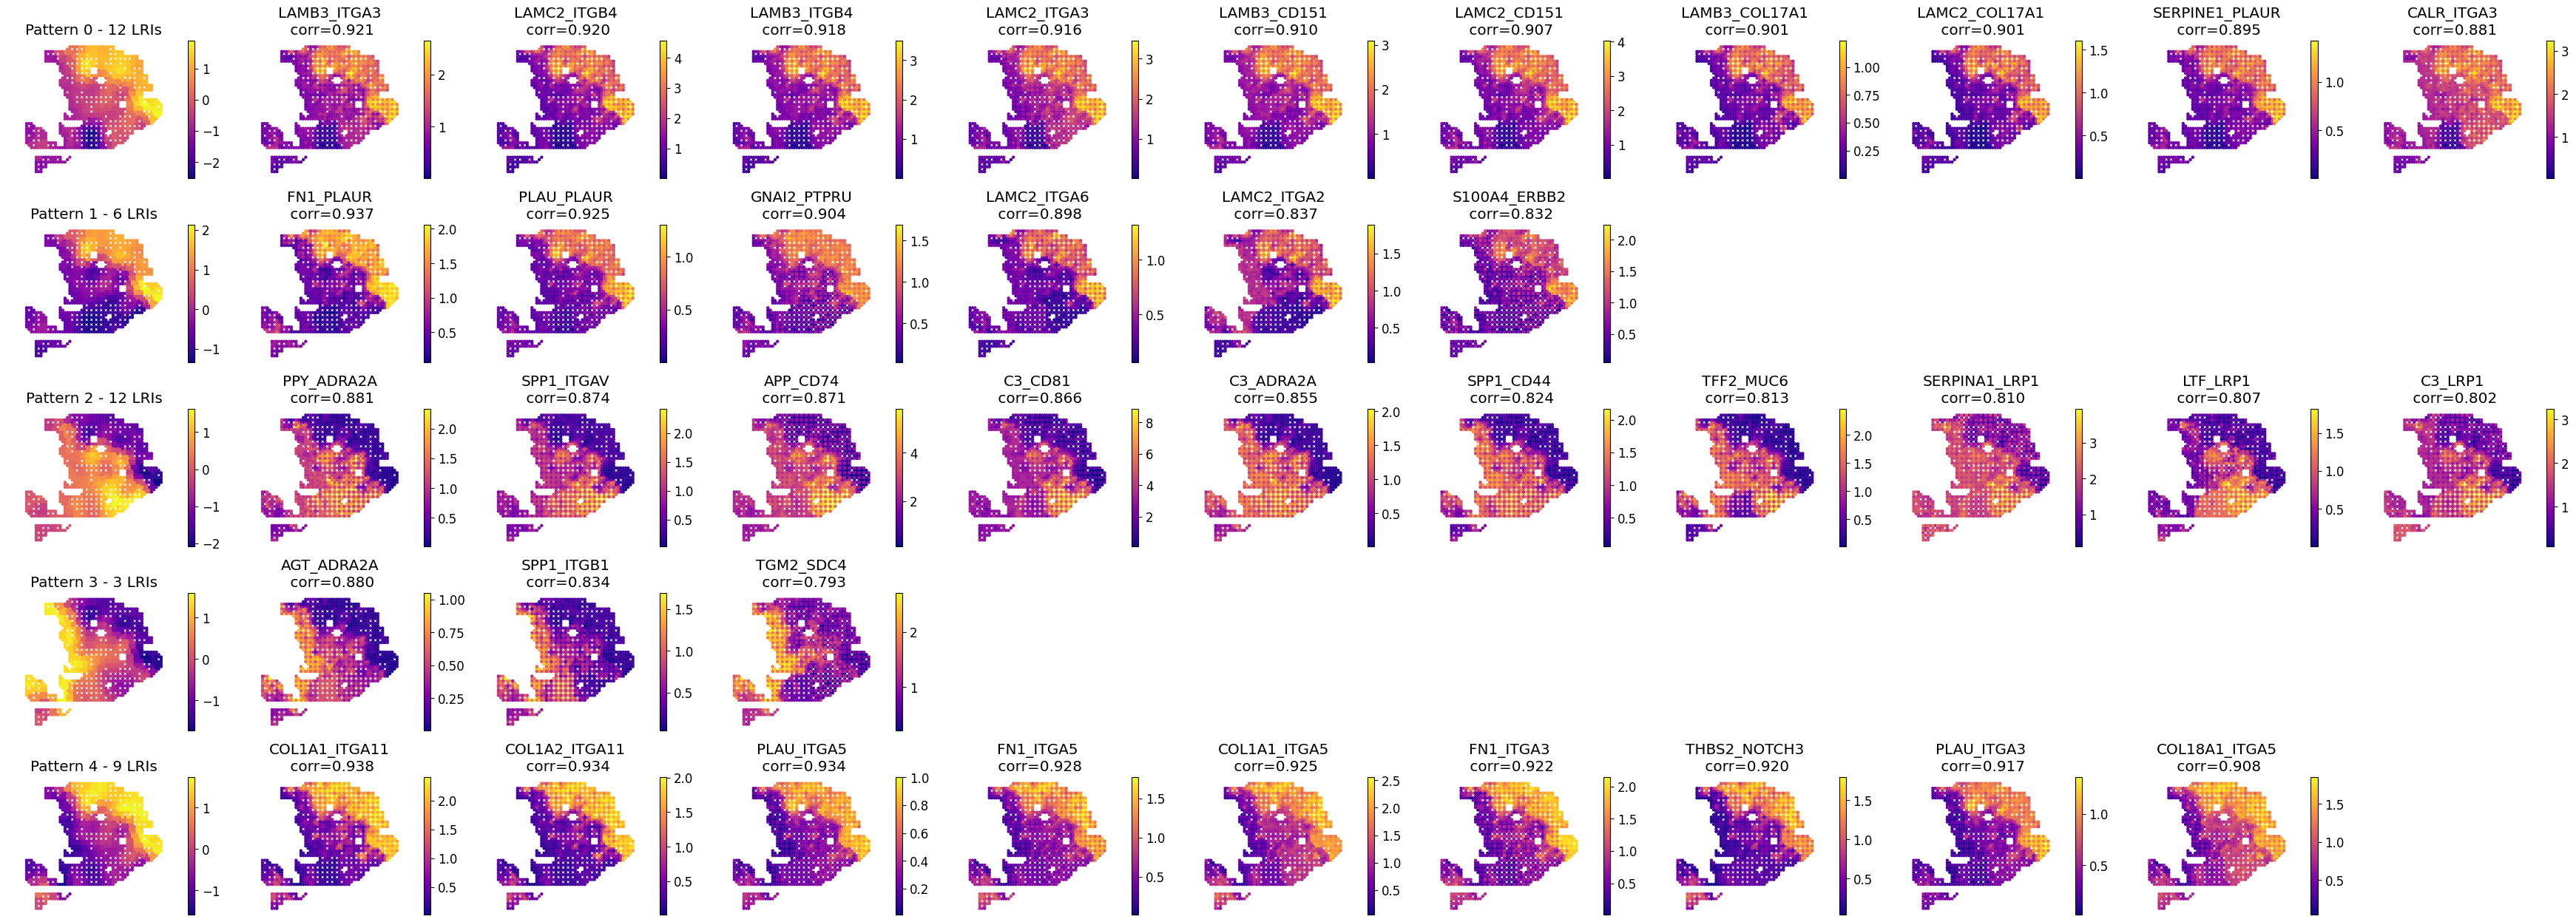

In [4]:
op.vis.pattern_LRI(idata,show_SVI=10, spot_size=10)
plt.tight_layout()
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_non-member vs. 1_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.089e-02 U_stat=4.500e+01
0_non-member vs. 0_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.357e-06 U_stat=1.100e+01
2_non-member vs. 2_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:2.901e-07 U_stat=0.000e+00
3_non-member vs. 3_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:8.711e-05 U_stat=0.000e+00
4_non-member vs. 4_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:2.857e-06 U_stat=0.000e+00


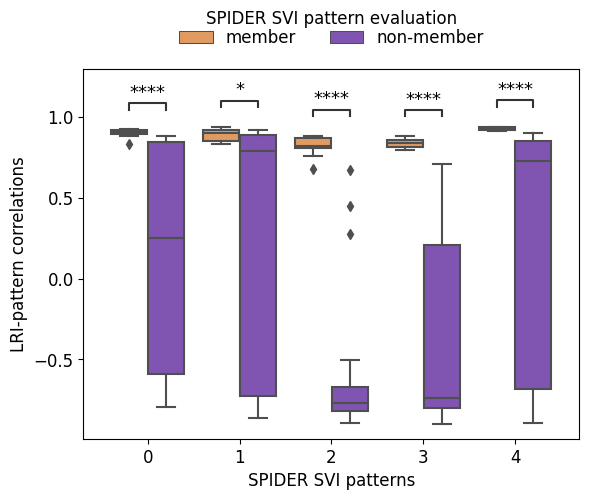

In [5]:
op.svi.eva_pattern(idata)
plt.show()

Basic comparison with SpatialDM

In [6]:
dm_expand = pd.read_csv(f'../example_datasets/{ds}/{sample_name}/spatialdm.csv', index_col=0)
dm_expand = dm_expand[dm_expand.selected==True]
dm_expand.index = dm_expand['ligand'] + '_' + dm_expand['receptor']

evaluating with ['moranI' 'gearyC' 'SOMDE' 'nnSVG']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Geary
C (rev.)_SpatialDM vs. Geary
C (rev.)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:6.553e-28 U_stat=4.730e+04
SOMDE
FSV_SpatialDM vs. SOMDE
FSV_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:4.000e-33 U_stat=4.894e+04
SOMDE
FSV_SPIDER vs. SOMDE
FSV_SpatialDM: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:1.023e-10 U_stat=8.799e+03
SOMDE
LR_SpatialDM vs. SOMDE
LR_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:1.918e-31 U_stat=4.843e+04
SOMDE
LR_SPIDER vs. SOMDE
LR_SpatialDM: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:2.627e-11 U_stat=8.907e+03
nnSVG
LR_SpatialDM vs. nn

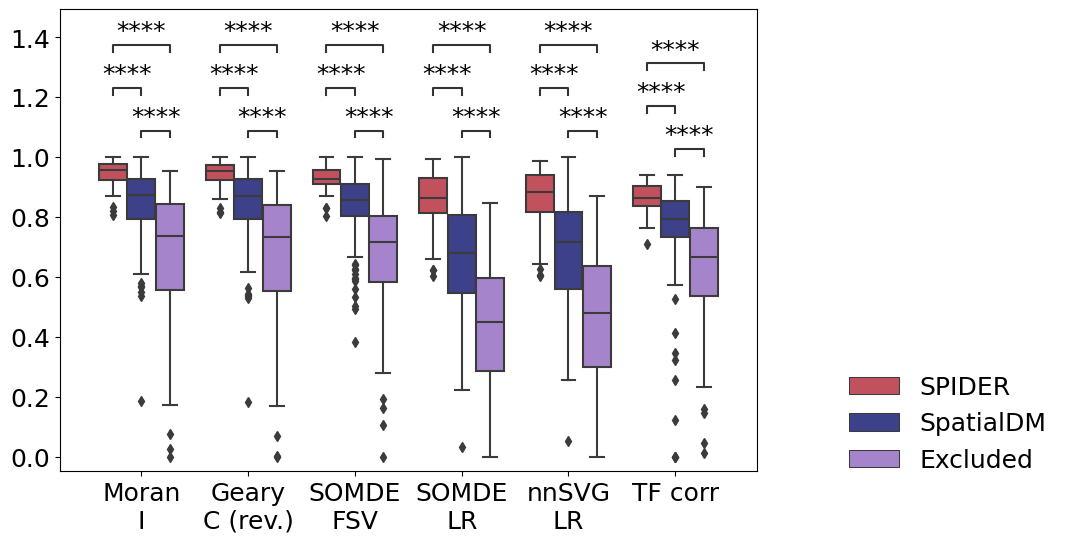

In [7]:
compare_sdm(idata, svi_df_strict, dm_expand)

TF-oriented comparison with SpatialDM

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PDAC_A_SPIDER-TF vs. PDAC_A_SpatialDM: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:4.676e-04 U_stat=5.612e+04


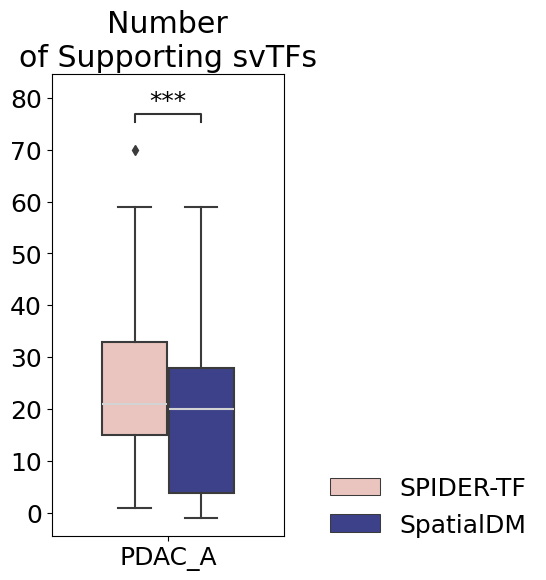

In [8]:
compare_sdm_tf(idata, dm_expand, ds, sample_name)

Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SpatialDE2' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC'
 'moranI']
43/498 SVIs identified (threshold=0.01).
Excluding 1 genes without TF support
42/498 tf-supported SVIs identified.


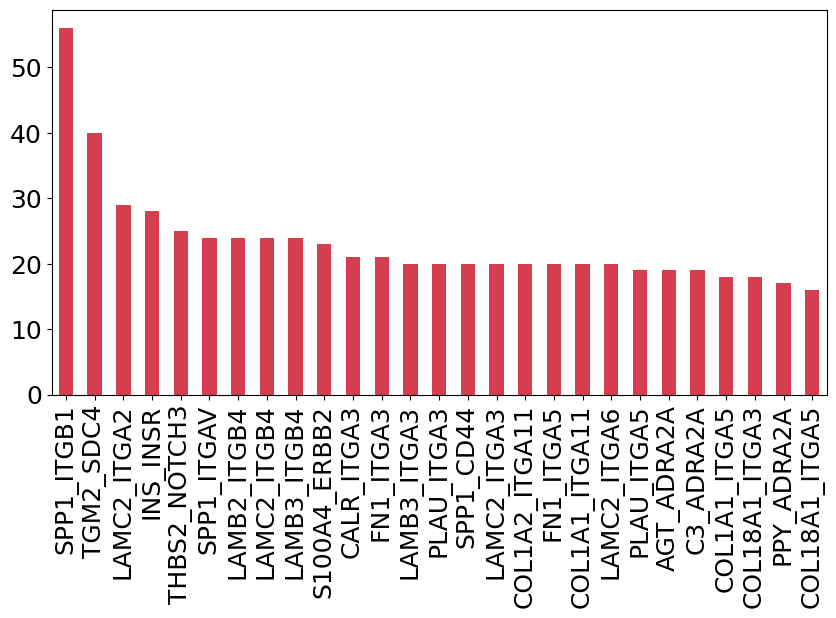

In [9]:
svi_support = top_supported_svi(idata)

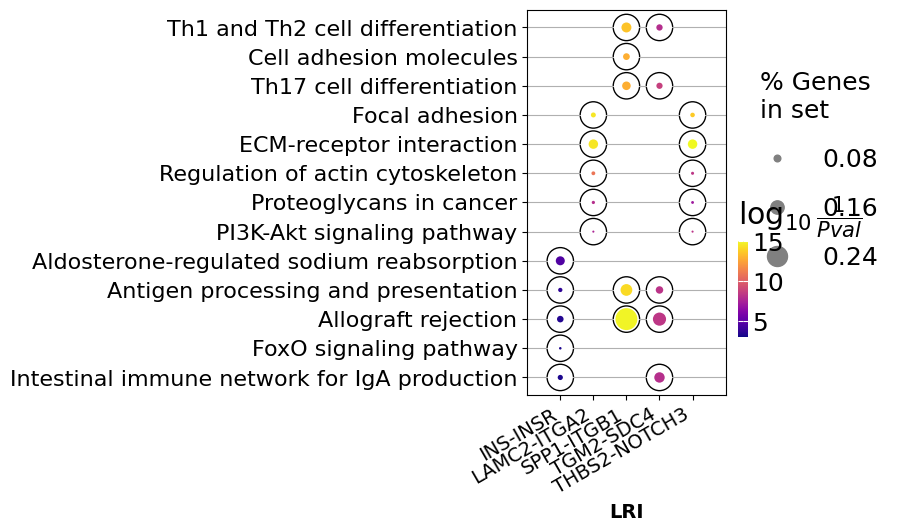

In [10]:
go_results = go_svi_tf(idata, svi_support.index[:5])

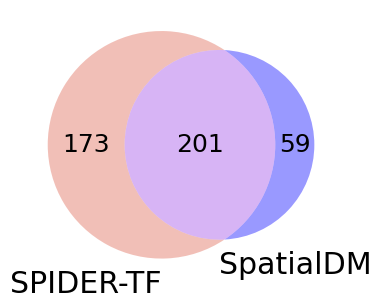

In [11]:
tf_venn(idata, dm_expand)

Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SpatialDE2' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC'
 'moranI']
43/498 SVIs identified (threshold=0.01).
Excluding 1 genes without TF support
42/498 tf-supported SVIs identified.


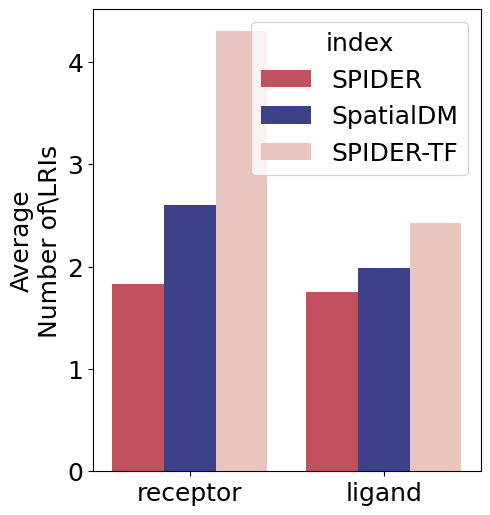

In [12]:
average_lr(idata, dm_expand)

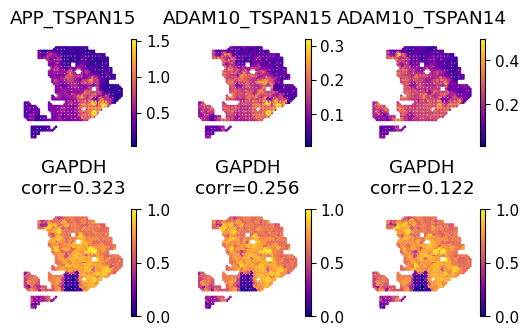

In [13]:
lris = ['APP_TSPAN15', 'ADAM10_TSPAN14', 'ADAM10_TSPAN15']
plot_top_tf(idata, lris)

SVI-oriented comparison with SpaitialDM

In [14]:
bin_spots = pd.read_csv(f'../example_datasets/{ds}/{sample_name}/spatialdm_bin_spots.csv', index_col=0).T
bin_spots = bin_spots[bin_spots.columns.intersection(dm_expand.index)]
sdm_adata = anndata.AnnData(X=bin_spots)
sdm_adata.obs = adata.obs
sdm_adata.obsm['spatial'] = adata.obsm['spatial']

idata = idata[:, idata.var['is_svi'] == 1]
op.util.interaction_spot_interface(idata)
adata = adata[adata.obs_names.isin(idata.uns['cell_score'].index)]
adata_lri = anndata.AnnData(idata.uns['cell_score'].loc[adata.obs_names])
adata_lri.obs=adata.obs
adata_lri.obsm['spatial'] = adata.obsm['spatial']
adata_lri = adata_lri[:, adata_lri.var_names[idata.var['is_svi'].to_numpy().astype(bool)]]

Added key cell_score in idata.uns


In [15]:
sdm_corr, sdm_corr_sub = celltype_correlation(sdm_adata, adata.obsm['deconvolution'])
spider_corr, spider_corr_sub = celltype_correlation(adata_lri, adata.obsm['deconvolution'])

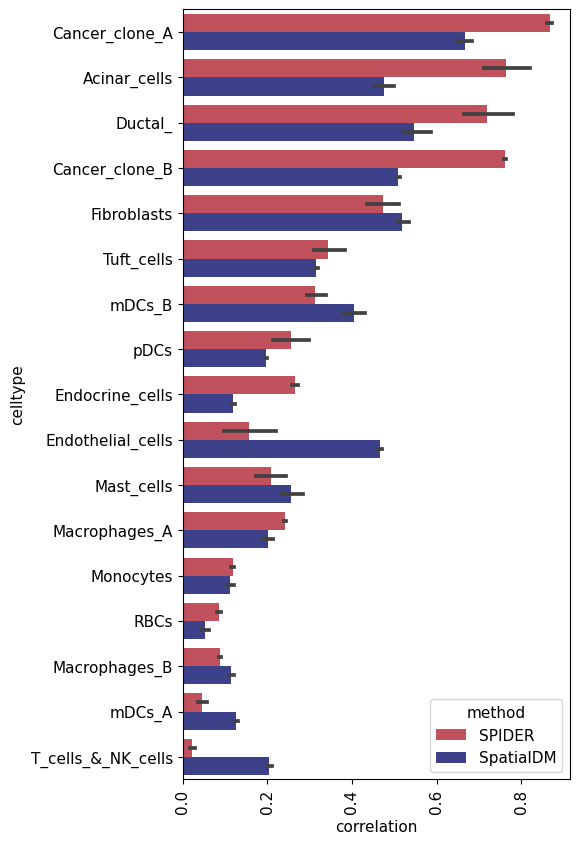

In [16]:
plot_correlation(spider_corr_sub, sdm_corr_sub)

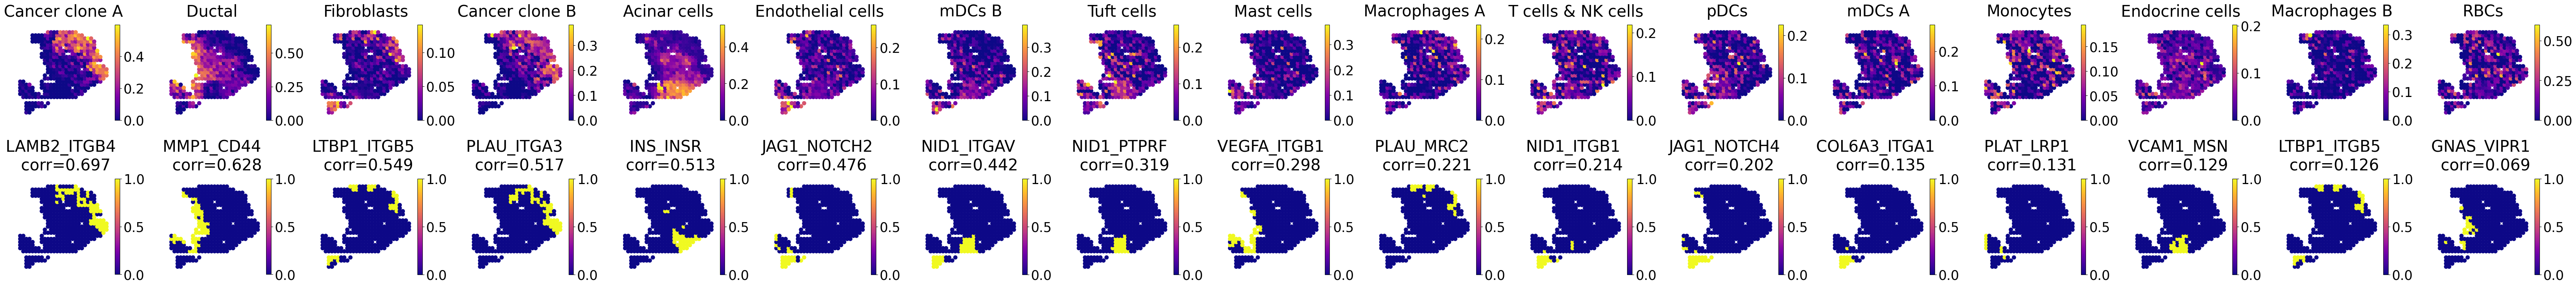

In [17]:
plot_sdm_per_ct(adata, sdm_adata, idata)

Added key cell_score in idata.uns


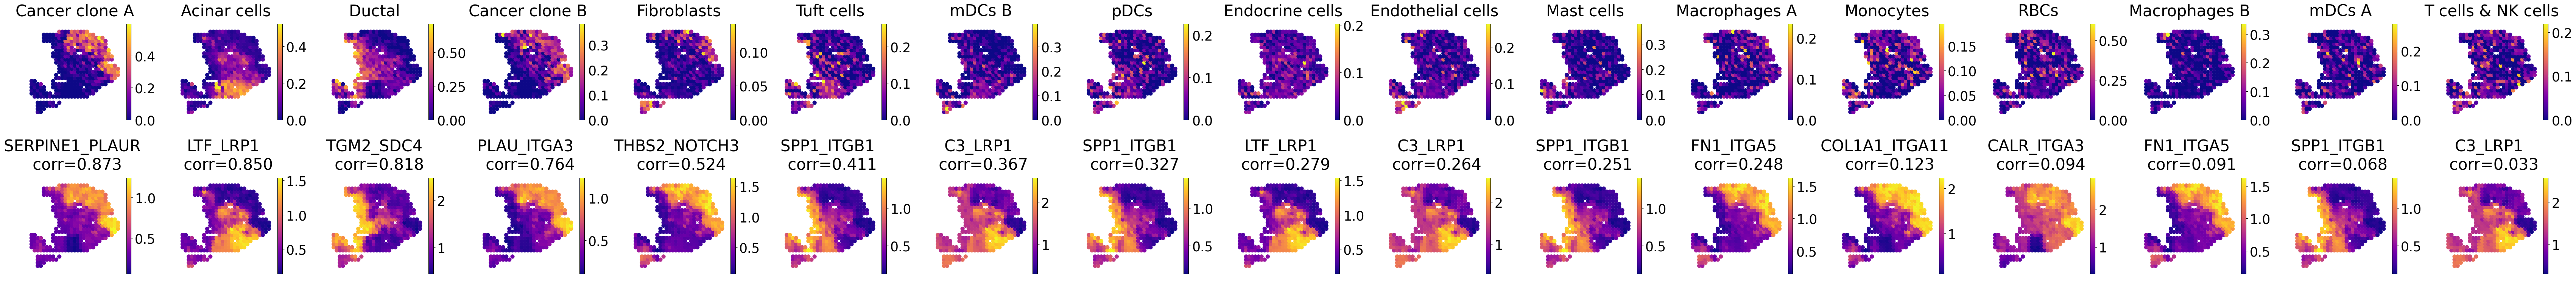

In [18]:
plot_spider_per_ct(idata, adata)

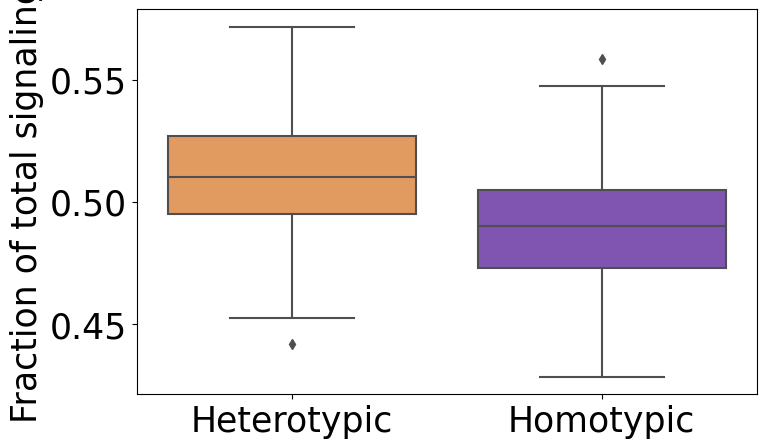

In [19]:
plot_interaciton_hetro_homo(idata)

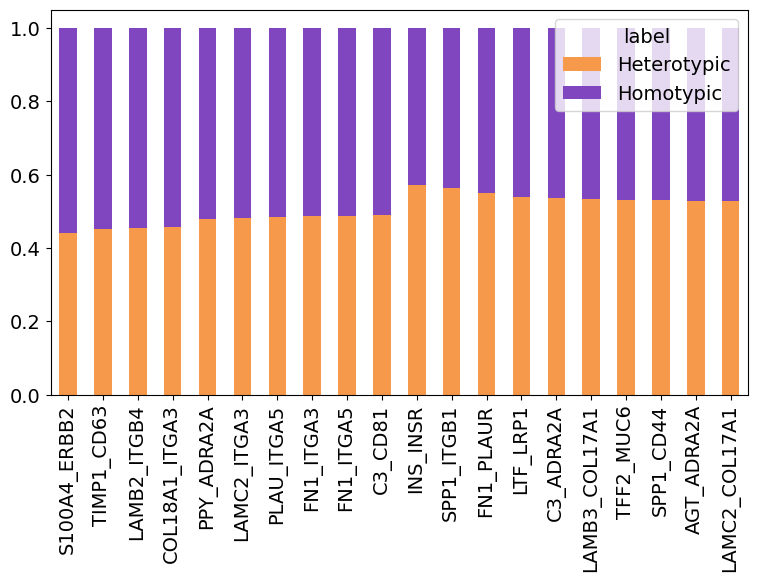

In [54]:
sig_frac, sig_frac_homo, sig_frac_heter = plot_percentage_hete_homo(idata)

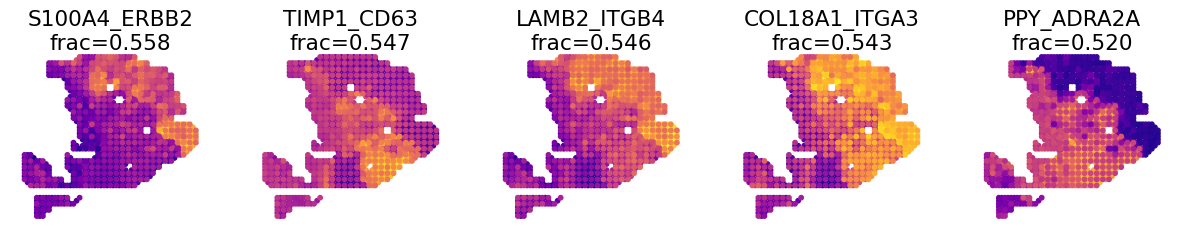

In [61]:
plot_lris_homo(idata, sig_frac_homo)

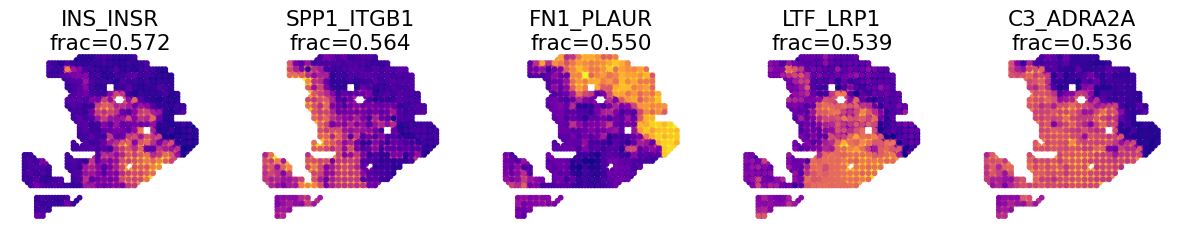

In [64]:
plot_lris_hete(idata, sig_frac_heter)

In [20]:
_, spider_counts_df = get_interaction_type(svi_df_strict, adata.uns['is_human'])
_, spatialdm_counts_df = get_interaction_type(dm_expand, adata.uns['is_human'])



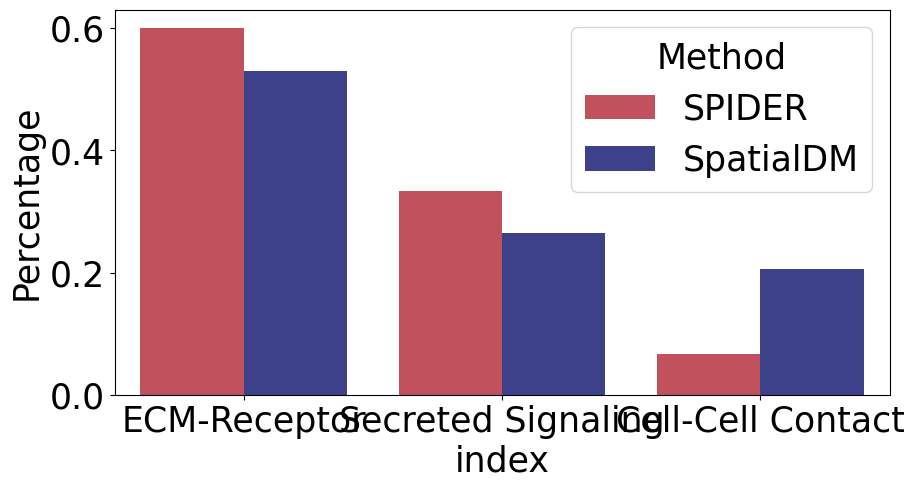

In [21]:
plot_interaction_type(spider_counts_df, spatialdm_counts_df)

SVI pattern-oriented comparison with SpatialDM

In [22]:
sdm_patterns = pd.read_csv(f'../example_datasets/{ds}/{sample_name}/spatialdm_patterns.csv', index_col=0)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
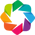

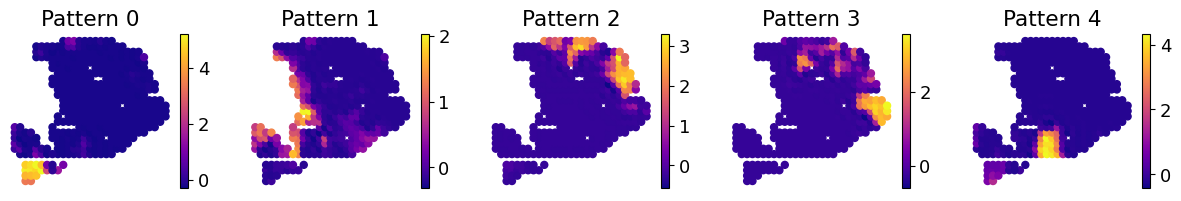

In [23]:
plot_sdm_pattern(adata, sdm_patterns)

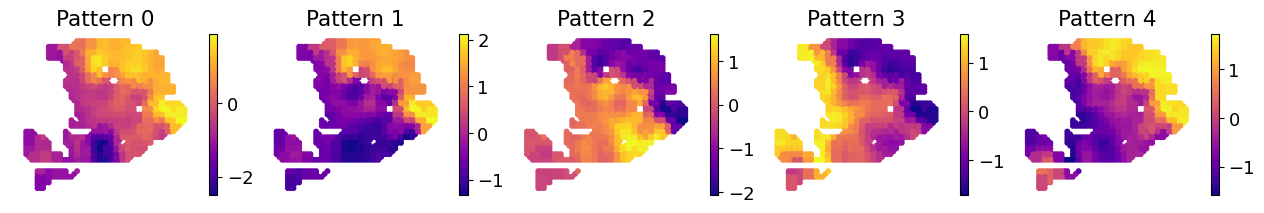

In [24]:
op.vis.pattern_LRI(idata, show_SVI=0, spot_size=18)
plt.show()

Added key cell_pattern in idata.uns
Added key cell_score in idata.uns
Added key interaction_pattern, interaction_score in adata.obsm
Added key rank_interaction_score_groups, rank_interaction_pattern_groups in adata.uns


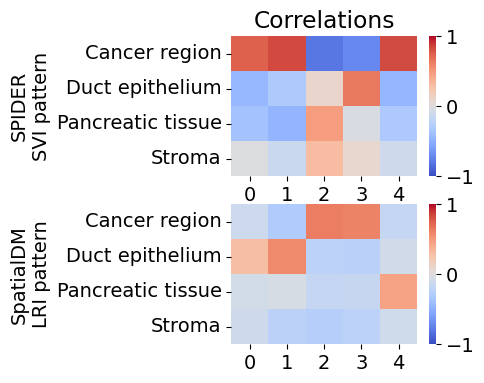

In [25]:
ct_pattern_corr(idata, adata, sdm_patterns)

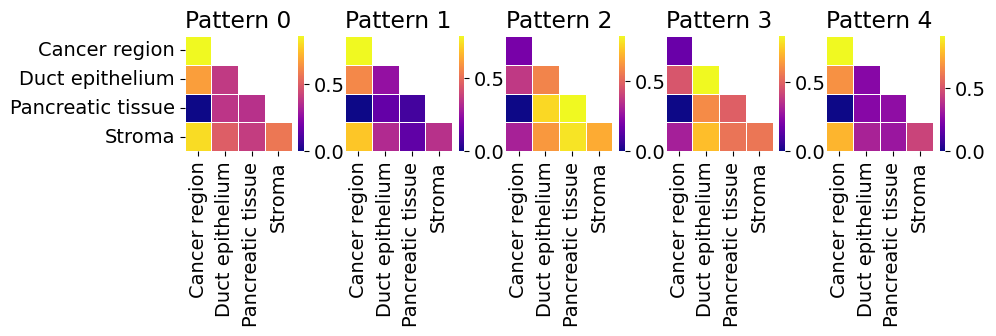

In [26]:
ct_cross_corr(idata)